In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
# Step 2: Load the dataset
df = pd.read_csv('Mall_Customers.csv', encoding='ISO-8859-1')

In [26]:
df['Annual Income (k$)'] = pd.to_numeric(df['Annual Income (k$)'], errors='coerce')
df['Spending Score (1-100)'] = pd.to_numeric(df['Spending Score (1-100)'], errors='coerce')


In [27]:
df.dropna(subset=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], inplace=True)


In [28]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
print(X_scaled.shape)  # Ensure it's a numpy array with correct shape
print(X_scaled[:5])     # Print the first 5 rows to ensure scaling worked

(200, 3)
[[0.01923077 0.         0.3877551 ]
 [0.05769231 0.         0.81632653]
 [0.03846154 0.00819672 0.05102041]
 [0.09615385 0.00819672 0.7755102 ]
 [0.25       0.01639344 0.39795918]]


In [31]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

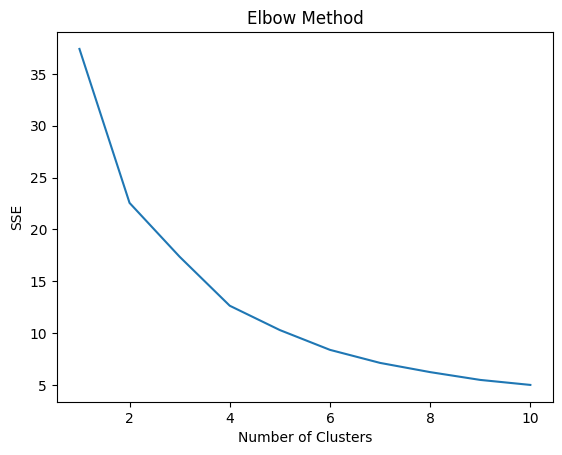

In [32]:
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


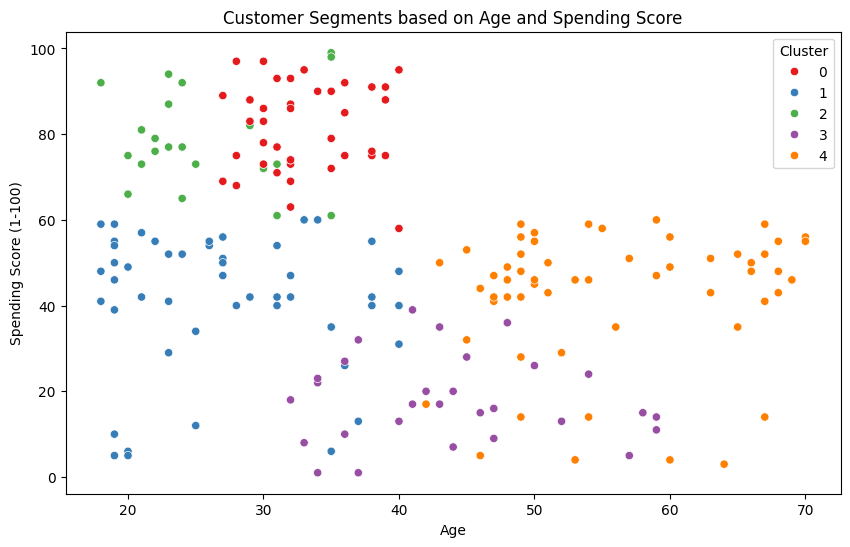

In [38]:
# Scatter plot: Age vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


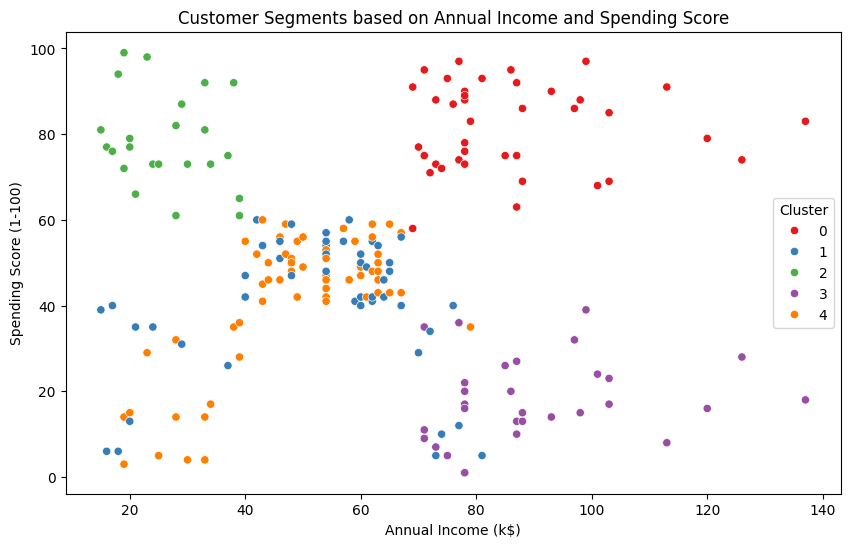

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


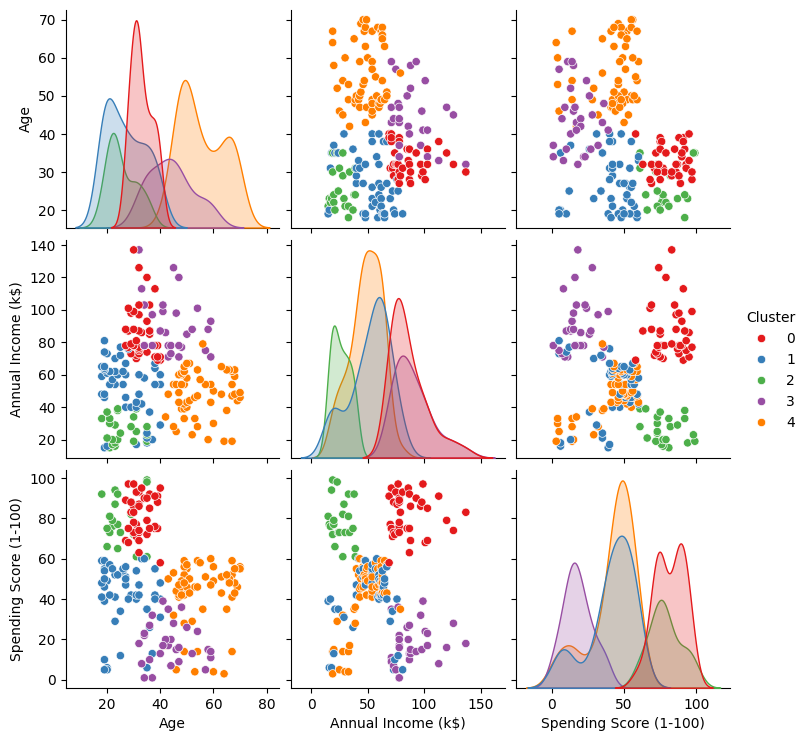

In [40]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()


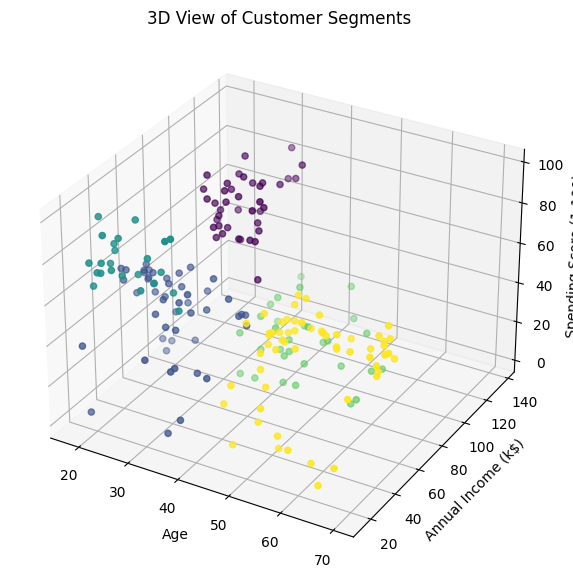

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot: Age vs Income vs Spending Score
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D View of Customer Segments')
plt.show()
